Exercise 1: Backtest the reversal strategy using stocks_SP500 file. Do the backtesting by forming long/short portfolios.

In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

!pip install empyrical
import numpy as np
import empyrical as ep
df = pd.read_csv('stocks_SP500.csv')
df['date'] = pd.to_datetime(df['date'].str.strip(), format='%Y-%m-%d')
df= df.set_index('date')
print(df)

             permno       start      ending       ret          mcap  \
date                                                                  
2000-01-31  60206.0  1982-09-16  2022-12-30  0.011765  1.572698e+06   
2000-01-31  11850.0  1925-12-31  2022-12-30  0.035687  2.888251e+08   
2000-01-31  17830.0  1957-03-01  2022-12-30 -0.185577  2.534335e+07   
2000-01-31  53613.0  1994-09-27  2022-12-30 -0.200161  1.582193e+07   
2000-01-31  44644.0  1981-02-26  2022-12-30 -0.119490  2.965356e+07   
...             ...         ...         ...       ...           ...   
2022-12-30  64390.0  1997-08-04  2022-12-30 -0.018464  7.588943e+07   
2022-12-30  85058.0  2006-04-03  2022-12-30 -0.048835  1.059350e+07   
2022-12-30  23819.0  1957-03-01  2022-12-30  0.041700  3.573165e+07   
2022-12-30  75694.0  2021-08-30  2022-12-30 -0.024826  1.300967e+07   
2022-12-30  18411.0  1944-06-07  2022-12-30  0.055736  7.774214e+07   

                                   comnam    ncusip      namedt    nameendt 

Don't need to run next code block if F-F_Research_Data_Factors.csv is already obtained.

In [ ]:
# import requests, zipfile, io
# url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip'
# response = requests.get(url, stream=True)
# zipfile = zipfile.ZipFile(io.BytesIO(response.content))
# zipfile.extractall()
# rf = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=10)


# clean the rf data manually - add date, delete the headers and annualy risk free rates at the end

In [ ]:
rf = pd.read_csv('F-F_Research_Data_Factors.csv')
#merge rf with df sample
#put the dates in common format
rf.index = pd.to_datetime(rf['date'], format='%Y%m',errors='coerce').dropna()
rf.index = rf.index.strftime('%Y-%m')
df.index = df.index.strftime('%Y-%m')
df= df.join(rf)

#df= pd.merge(df, rf)
#calculating excess returns - RF is in %
df["exret"]= df["ret"]- (df["RF"]/100)
df.index = pd.to_datetime(df.index, format='%Y-%m')
print(df)

             permno       start      ending       ret          mcap  \
date                                                                  
2000-01-01  60206.0  1982-09-16  2022-12-30  0.011765  1.572698e+06   
2000-01-01  11850.0  1925-12-31  2022-12-30  0.035687  2.888251e+08   
2000-01-01  17830.0  1957-03-01  2022-12-30 -0.185577  2.534335e+07   
2000-01-01  53613.0  1994-09-27  2022-12-30 -0.200161  1.582193e+07   
2000-01-01  44644.0  1981-02-26  2022-12-30 -0.119490  2.965356e+07   
...             ...         ...         ...       ...           ...   
2022-12-01  64390.0  1997-08-04  2022-12-30 -0.018464  7.588943e+07   
2022-12-01  85058.0  2006-04-03  2022-12-30 -0.048835  1.059350e+07   
2022-12-01  23819.0  1957-03-01  2022-12-30  0.041700  3.573165e+07   
2022-12-01  75694.0  2021-08-30  2022-12-30 -0.024826  1.300967e+07   
2022-12-01  18411.0  1944-06-07  2022-12-30  0.055736  7.774214e+07   

                                   comnam    ncusip      namedt    nameendt 

In [ ]:
# now keep date, permno, ticker, exret, and lag of size (market cap) in the dataframe
df= df[["permno", "ticker", "exret","mcap"]]
df['exret_lag'] = df.groupby(['permno'])['exret'].shift(1)
#drop observations with nan variables
df= df.dropna()
print(df)

             permno ticker     exret          mcap  exret_lag
date                                                         
2000-02-01  39917.0     WY -0.109964  1.209938e+07  -0.199574
2000-02-01  25081.0    CMA -0.171202  5.757180e+06  -0.057648
2000-02-01  49905.0    LIZ  0.106236  2.213193e+06  -0.105429
2000-02-01  87292.0    PTV -0.105651  1.392003e+06  -0.133512
2000-02-01  65875.0    BEL -0.214189  7.598946e+07   0.008245
...             ...    ...       ...           ...        ...
2022-12-01  64390.0    PGR -0.021764  7.588943e+07   0.026306
2022-12-01  85058.0    BXP -0.052135  1.059350e+07  -0.011428
2022-12-01  23819.0    HAL  0.038400  3.573165e+07   0.037462
2022-12-01  75694.0   TECH -0.028126  1.300967e+07   0.145686
2022-12-01  18411.0     SO  0.052436  7.774214e+07   0.040472

[137344 rows x 5 columns]


<ipython-input-4-e6168ea2ec1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exret_lag'] = df.groupby(['permno'])['exret'].shift(1)


In [ ]:
# form long/short portfolios based on their size
df['rank'] = df.groupby(['date'])['exret_lag'].rank()
df['n'] = df.groupby(['date'])['exret_lag'].count()
df['group']= df["rank"]/df['n']
#long and short portfolios
df['long'] = df.apply(lambda x : 1 if x['group'] < 0.05 else 0, axis=1)
df['short'] = df.apply(lambda x : 1 if x['group'] > 0.95 else 0, axis=1)
print(df)

NameError: ignored

In [ ]:
# Form long/short portfolios
df_long= df[df["long"]== 1]
df_short= df[df["short"]== 1]
long_portfolio_returns= df_long.groupby(['date'])['exret'].mean()
print(long_portfolio_returns)
short_portfolio_returns= df_short.groupby(['date'])['exret'].mean()
print(short_portfolio_returns)

date
2000-02-01    0.044631
2000-03-01    0.328877
2000-04-01   -0.192540
2000-05-01    0.061652
2000-06-01    0.019706
                ...   
2022-08-01   -0.039238
2022-09-01   -0.159034
2022-10-01    0.085830
2022-11-01    0.040384
2022-12-01   -0.151812
Name: exret, Length: 275, dtype: float64
date
2000-02-01   -0.051050
2000-03-01    0.099300
2000-04-01    0.009641
2000-05-01    0.014538
2000-06-01   -0.030021
                ...   
2022-08-01   -0.036256
2022-09-01   -0.093734
2022-10-01    0.095539
2022-11-01    0.066787
2022-12-01   -0.050098
Name: exret, Length: 275, dtype: float64


In [ ]:
# Combine portfolios: create long-short portfolio
total_portfolio_returns = long_portfolio_returns - short_portfolio_returns
# Print portfolio returns
print(total_portfolio_returns)

date
2000-02-01    0.095681
2000-03-01    0.229577
2000-04-01   -0.202181
2000-05-01    0.047114
2000-06-01    0.049727
                ...   
2022-08-01   -0.002982
2022-09-01   -0.065300
2022-10-01   -0.009709
2022-11-01   -0.026402
2022-12-01   -0.101713
Name: exret, Length: 275, dtype: float64


In [ ]:
# evaluate portfolio
def strategy_eval(x, name):
  strategy_avg = x.mean()
  strategy_std = x.std()
  strategy_MDD = ep.max_drawdown(x)
  strategy_SR = (strategy_avg / strategy_std)
  print(name, "avg", strategy_avg, "std:", strategy_std, "MDD:" , strategy_MDD, "SR:", strategy_SR)

strategy_eval(total_portfolio_returns, "H-L size portfolio")
# compare with equal weighted portfolio of all stocks
ew_portfolio_returns= df.groupby(['date'])['exret'].mean()
strategy_eval(ew_portfolio_returns, "EW portfolio")

H-L size portfolio avg 0.007634036078963169 std: 0.13118720655075777 MDD: -0.7718815630293332 SR: 0.05819192495732788
EW portfolio avg 0.008020714534321386 std: 0.051426373118297036 MDD: -0.570140460866583 SR: 0.1559650048793289


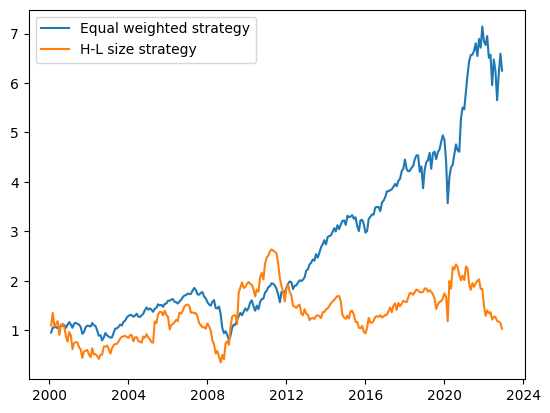

In [ ]:
# Plot the cumulative returns for all 3 strategies
cr_ew_portfolio_returns = (1 + ew_portfolio_returns).cumprod()
cr_total_portfolio_returns = (1 + total_portfolio_returns).cumprod()
plt.plot(cr_ew_portfolio_returns, label='Equal weighted strategy')
plt.plot(cr_total_portfolio_returns, label='H-L size strategy')
plt.legend()
plt.show()